# Data Analysis
# Dimensionality Reduction

In this notebook, we'll discuss
* Dimensionality reduction 
* Singular Value Decomposition (SVD) 
* Principal Component Analysis (PCA)
* Using PCA for EDA and visualization 

Recommended Reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.2 [digital version available here](http://www.statlearning.com/)
* V. Powell, [Principal Component Analysis: Explained Visually](http://setosa.io/ev/principal-component-analysis/)
* B. Everitt and T. Hothorn, [An Introduction to Applied Multivariate Analysis with R](https://www.springer.com/us/book/9781441996497), Ch. 3

In [2]:
# importas galore

import numpy as np

import pandas as pd
#pd.set_option('display.notebook_repr_html', False)

from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

import seaborn as sns

#to get numbers in a nice format
np.set_printoptions(suppress=True)

# 0. Recap: Supervised vs. Unsupervised Learning

### Supervised Learning
**Data:** both the features, $x$, and a response, $y$, for each item in the dataset.

**Goal:** 'learn' how to predict the response from the features.

**Examples:**
* Regression
* Classification

### Unsupervised Learning 
**Data:** only the features, $x$, for each item in the dataset.

**Goal:** discover 'interesting' things about the dataset.

**Examples:**
* Dimensionality reduction, Principal Component Analysis (PCA)
* Clustering

# 1. Dimensionality Reduction
The dimensionality of a database is the 'rank' of the matric, the #of cols in matrix that are linearly independent. ie if we have wieghts in kgs and in lbs such will be considered as just one dimension even if they are two differnet attributes. HAving an outlier in such two fields, will make the data have 2 dim instead of one as said before, this is why some. For example, in the table below, the perimeter is the sum of the width and height, but the area is the multiplication of both, making it no longer a 'linear' combnation of both. Thus the rank of the table is 3 ( w, h, and a) 

In data analysis, [**dimensionality reduction**](https://en.wikipedia.org/wiki/Dimensionality_reduction) is the process of reducing the number of features in a dataset. 

There are two approaches to dimensionality reduction: **feature selection** and **feature extraction**.


In **feature selection**, one just picks a subset of the available features. We discussed feature selection in the context of regression tasks. Remember?

In **feature extraction**, the data is transformed from a high-dimensional space to a lower dimensional space. The most common method is called **principal component analysis (PCA)**, where the transformation is taken to be linear, but many other methods exist. In this class, we'll focus on PCA. 

**Why dimensionality reduction?**
- Remove redundancies and simplifies the dataset making it easier to understand.
- It's easier to visualize low dimensional data.
- It reduces storage space for large datasets (because of less features).
- It reduces time for computationally intensive tasks (again, because of less features).
- Reducing dimensionality can help avoid overfitting in supervised learning tasks.

## 1.1 SVD Demo, singular value decomposition

In [3]:
rectangle = pd.read_csv("rectangle_data.csv")
rectangle.head(5)

,width,height,area,perimeter
0,8,6,48,28
1,2,4,8,12
2,1,3,3,8
3,9,3,27,24
4,9,8,72,34


Singular value decomposition is a numerical technique to automatically decompose matrix into two matrices. Given an input matrix X, SVD will return $U\Sigma$ and $V^T$ such that $ X = U \Sigma V^T $.

In [4]:
u, s, vt = np.linalg.svd(rectangle, full_matrices = False)

The SVD routine returns $U$ and $\Sigma$ as two separate variables. To compute $U \Sigma$ we simply write:

In [5]:
usig = u * s

In [6]:
print(rectangle.shape)
print(usig.shape)
print(vt.shape)

(100, 4)
(100, 4)
(4, 4)


In [6]:
print(usig)
#pd.DataFrame(usig).head(10)

[[-56.30926787   4.08369641  -0.76796869   0.        ]
 [-13.92587137  -5.61592446   1.59106852  -0.        ]
 [ -7.3883695   -5.11089273   1.51352951   0.        ]
 [-36.84443159  -4.80005945  -3.80095908  -0.        ]
 [-79.47260546  13.00269827   0.18659785  -0.        ]
 [ -7.42135662  -5.11810904  -1.31469604   0.        ]
 [-13.95885849  -5.62314077  -1.23715703   0.        ]
 [-37.98955728  -1.31360807  -0.26071277   0.        ]
 [-15.6692269   -9.65347804  -4.03555325   0.        ]
 [-25.44680915  -7.81311695  -3.92620778  -0.        ]
 [-32.68750933  -2.52515864   0.38769508  -0.        ]
 [-53.89570114   2.32104364  -2.20593631  -0.        ]
 [-40.87803851  -1.86471027  -2.34708823  -0.        ]
 [ -5.34289549  -3.98065864   0.77963103   0.        ]
 [-28.2033419   -8.33535389   5.30031897   0.        ]
 [-64.00838899   7.0615079    1.43570386  -0.        ]
 [-43.29160524  -0.1020575   -0.90912062   0.        ]
 [-13.92587137  -5.61592446   1.59106852  -0.        ]
 [-16.7813

In [7]:
pd.DataFrame(vt)

,0,1,2,3
0,-0.146436,-0.129942,-0.810020,-0.552756
1,-0.192736,-0.189128,0.586348,-0.763727
2,-0.704957,0.709155,0.007952,0.008396
3,-0.666667,-0.666667,0.000000,0.333333


The two key pieces of the decomposition are $U\Sigma$ and $V^T$, which we can think of for now as analogous to our 'data' and 'transformation operation' from our manual decomposition earlier.

As we did before with our manual decomposition, we can recover our original rectangle data by multiplying the left matrix $U\Sigma$ by the right matrix $V^T$.

In [8]:
pd.DataFrame(usig @ vt).head(10)

,0,1,2,3
0,8.0,6.0,48.0,28.0
1,2.0,4.0,8.0,12.0
2,1.0,3.0,3.0,8.0
3,9.0,3.0,27.0,24.0
4,9.0,8.0,72.0,34.0
5,3.0,1.0,3.0,8.0
6,4.0,2.0,8.0,12.0
7,6.0,5.0,30.0,22.0
8,7.0,1.0,7.0,16.0
9,8.0,2.0,16.0,20.0


Naturally, we can instead use only the first 3 columns of $U\Sigma$ and first 3 rows of $V^{\top}$ and get back the exactly correct result. This is because the last column of $U\Sigma$ is 0.

In [7]:
pd.DataFrame(usig[:, 0:3] @ vt[0:3, ]).head(10)

,0,1,2,3
0,8.0,6.0,48.0,28.0
1,2.0,4.0,8.0,12.0
2,1.0,3.0,3.0,8.0
3,9.0,3.0,27.0,24.0
4,9.0,8.0,72.0,34.0
5,3.0,1.0,3.0,8.0
6,4.0,2.0,8.0,12.0
7,6.0,5.0,30.0,22.0
8,7.0,1.0,7.0,16.0
9,8.0,2.0,16.0,20.0


## Low Rank Approximation

If we use only the first 2 rows of $U\Sigma$ and first 2 columns of $V^{\top}$, we end up with an imperfect reconstruction, but it's surprisingly not bad.

In [10]:
pd.DataFrame(usig[:, 0:2] @ vt[0:2, ]).head(10)

,0,1,2,3
0,7.458615,6.544609,48.006107,28.006448
1,3.121636,2.871685,7.987348,11.986642
2,2.066974,1.926672,2.987965,7.987293
3,6.320486,5.695470,27.030224,24.031912
4,9.131544,7.867673,71.998516,33.998433
5,2.073195,1.932324,3.010454,8.011038
6,3.127857,2.877336,8.009837,12.010387
7,5.816209,5.184886,30.002073,22.002189
8,4.155107,3.861834,7.032089,16.033882
9,5.232191,4.784291,16.031220,20.032964


Even the one dimensional approximation is better than you might expect.

In [11]:
pd.DataFrame(usig[:, 0:1] @ vt[0:1, ]).head(10)

,0,1,2,3
0,8.245690,7.316949,45.611639,31.125278
1,2.039245,1.809558,11.280236,7.697607
2,1.081921,0.960061,5.984728,4.083965
3,5.395342,4.787646,29.844730,20.365976
4,11.637630,10.326844,64.374407,43.928949
5,1.086752,0.964347,6.011448,4.102198
6,2.044076,1.813845,11.306956,7.715841
7,5.563029,4.936446,30.772305,20.998951
8,2.294535,2.036094,12.692389,8.661257
9,3.726322,3.306614,20.612427,14.065873


In [12]:
print(vt[0:1,])
print(vt[1:2,])
np.sum(vt[0:1,]*vt[1:2])

[[-0.14643575 -0.12994219 -0.8100201  -0.55275586]]
[[-0.1927359  -0.18912774  0.5863482  -0.76372728]]


5.551115123125783e-17

# 2. Principal Component Analysis (PCA)

PCA is a simple yet popular and useful linear transformation technique that is used in numerous applications, such as stock market predictions, the  analysis of gene expression data, and many more. We will break down PCA (to see that it is not just a "black box") and then see nice applications.

### 2.1 Introduction to PCA

The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

Before we get into the mathematical description of Principal Component Analysis (PCA), we can gain a lot of intuition by taking a look at [this visual overview](http://setosa.io/ev/principal-component-analysis/) by Victor Powell.


WE NEED TO CENTER (remove the mean) 

Often, the desired goal is to reduce the dimensions of a $d$-dimensional dataset by projecting it onto a $k$-dimensional subspace (where $k\;<\;d$) in order to increase the computational efficiency while retaining most of the information. An important question is "what is the size of $k$ that represents the data 'well'?"

We will compute eigenvectors (the principal components) of a dataset and collect them in a projection matrix. Each of those eigenvectors is associated with an eigenvalue which can be interpreted as the "length" or "magnitude" of the corresponding eigenvector. If some eigenvalues have a significantly larger magnitude than others that the reduction of the dataset via PCA onto a smaller dimensional subspace by dropping the "less informative" eigenpairs is reasonable.


PCA can be summarized in the following steps:

-  Center (or standardize) the data.
-  Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix (or perform Singular Vector Decomposition as we will see later).
-  Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where $k$ is the number of dimensions of the new feature subspace ($k \le d$).
-  Construct the projection matrix $\mathbf{W}$ from the selected $k$ eigenvectors.
-  Transform the original dataset $\mathbf{X}$ via $\mathbf{W}$ to obtain a $k$-dimensional feature subspace $\mathbf{Y}$.

**POLL**: Do you remember eigenvectors from linear algebra?

### 2.3 Eigendecomposition - Computing Eigenvectors and Eigenvalues

#### Standardizing

Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [13]:
#create function to center data
center_data = lambda x: x - x.mean()

X=rectangle

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_cnt = center_data(X)

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes. You have covered eigenvectors and eigenvalues in Linear Algebra but for a nice reminder check [this](http://setosa.io/ev/eigenvectors-and-eigenvalues/).

#### Covariance Matrix

The classic approach to PCA is to perform the eigendecomposition on the covariance matrix $\Sigma$, which is a $d \times d$ matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

We can summarize the calculation of the covariance matrix via the following matrix equation:  

$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right) = \mathbf{X} \mathbf{X^T}$  

where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \sum\limits_{i=1}^n x_{i}.$  
The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [14]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.01010101 -0.02670062  0.69121907  0.76870724]
 [-0.02670062  1.01010101  0.62435684  0.63473235]
 [ 0.69121907  0.62435684  1.01010101  0.94306847]
 [ 0.76870724  0.63473235  0.94306847  1.01010101]]


The more verbose way above was simply used for demonstration purposes, equivalently, we could have used the numpy `cov` function:

In [15]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.01010101 -0.02670062  0.69121907  0.76870724]
 [-0.02670062  1.01010101  0.62435684  0.63473235]
 [ 0.69121907  0.62435684  1.01010101  0.94306847]
 [ 0.76870724  0.63473235  0.94306847  1.01010101]]


What does the covariance matrix show us?

+ The diagonal is the variance of each variable. The sum of this diagonal is called "trace" and shows us the total variance in the data
+ The values outside the diagonal (notice that it's a symmetric matrix) shows us the degree to which variables are correlated

Next, we perform an eigendecomposition on the covariance matrix. How do we do that? By doing an eigenanalysis on the covariance matrix.

$$
|\Sigma - \lambda I|= 0
$$

By solving this equation we find the eigenvalues and then we can compute the eigenvectors. That is an easy equation to solve if we have 2 variables (because the matrices are going to be $2 \times 2$ but it's becoming more challenging with more variables. 

In [16]:
#cov_mat = np.cov(X.T)
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.43759561 -0.65472309  0.5466161   0.28470791]
 [ 0.37560774  0.75521251  0.45584801  0.28421027]
 [ 0.57100602  0.02481468  0.         -0.82057075]
 [ 0.58427822 -0.01938982 -0.70243394  0.40599208]]

Eigenvalues 
[ 2.9155136   1.03746732 -0.          0.08742311]


What did we achieve now? You will be amazed!

+ The eigenvalues show the variances of the coordinates of each *new* principal component axis

You will notice that the total variance remains the same! Why? Because we keep all data, we just stretch the original dimensions, so that their covariance is minimized.

In [17]:
print(sum(np.diagonal(np.cov(X.T))))
print(sum(eig_vals))
print(sum(np.diagonal(np.cov(X_std.T))))

406.6248484848486
4.040404040404041
4.04040404040404


+ Each eigenvector consists of 4 values which represent the “contribution” (or else called "loading") of each variable to the new principal component axis.
+ Eigenvectors are uncorrelated (orthogonal) meaning that their cross-product is zero. Why? Because that's what we wanted: New axes that are independent.

In [18]:
print(sum(eig_vecs[:,0]*eig_vecs[:,1]))
print(sum(eig_vecs[:,2]*eig_vecs[:,3]))

6.765421556309548e-17
-8.881784197001252e-16


#### A note aside: Correlation Matrix

In some fields (like Finance), the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix.

Eigendecomposition of the standardized data based on the correlation matrix:

In [19]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.43759561 -0.65472309  0.5466161   0.28470791]
 [ 0.37560774  0.75521251  0.45584801  0.28421027]
 [ 0.57100602  0.02481468  0.         -0.82057075]
 [ 0.58427822 -0.01938982 -0.70243394  0.40599208]]

Eigenvalues 
[2.88635847 1.02709265 0.         0.08654888]


Eigendecomposition of the raw data based on the correlation matrix:

In [20]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.43759561 -0.65472309  0.5466161   0.28470791]
 [ 0.37560774  0.75521251  0.45584801  0.28421027]
 [ 0.57100602  0.02481468 -0.         -0.82057075]
 [ 0.58427822 -0.01938982 -0.70243394  0.40599208]]

Eigenvalues 
[2.88635847 1.02709265 0.         0.08654888]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:
    
- Eigendecomposition of the covariance matrix after standardizing the data.
- Eigendecomposition of the correlation matrix.
- Eigendecomposition of the correlation matrix after standardizing the data.

### 2.4 Selecting Principal Components

#### Sorting Eigenpairs

The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. Note that the eigenvectors only define the directions of the new axis, since they have all the same unit length 1.

In order to decide which eigenvector(s) can be dropped without losing too much information
for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.  

In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top $k$ eigenvectors.

In [21]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.8863584659090997
1.027092650280962
0.08654888380993685
2.833266648937917e-16


#### Explained Variance

After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

The amount of variance captured by the ith principal component is equal to (ith singular value)$^2$ / N.

In [22]:
np.round(eig_vals**2 / sum(eig_vals**2), 2)

array([0.89, 0.11, 0.  , 0.  ])

We can also show this in the form of what is usually called a "scree plot".

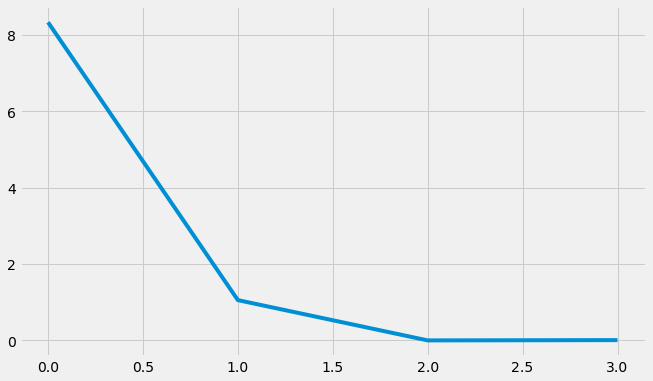

In [23]:
plt.plot(eig_vals**2);

In [24]:
tot = sum(eig_vals**2)
var_exp = [(i**2 / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [25]:
print(cum_var_exp)

[ 88.6899151   99.92025625 100.         100.        ]


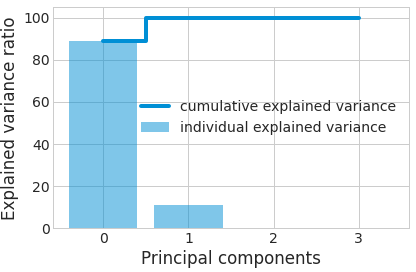

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

PCA gives independent 

The plot above clearly shows that most of the variance (88.7% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (around 11%) while the third and fourth principal components can safely be dropped without losing too much (or any?) information.

#### Projection Matrix

It's about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name "projection matrix" has a nice ring to it, it is basically just a matrix of our concatenated top *k* eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the "top 2" eigenvectors with the highest eigenvalues to construct our $d \times k$-dimensional eigenvector matrix $\mathbf{W}$.

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.43759561 -0.65472309]
 [ 0.37560774  0.75521251]
 [ 0.57100602  0.02481468]
 [ 0.58427822 -0.01938982]]


### 2.5 Projection Onto the New Feature Space

In this last step we will use the $4 \times 2$-dimensional projection matrix $\mathbf{W}$ to transform our samples onto the new subspace via the equation  
$\mathbf{Y} = \mathbf{X} \times  \mathbf{W}$, where $\mathbf{Y}$ is a $150\times 2$ matrix of our transformed samples. Recall that our original data is a $150 \times 4$-dimensional matrix.

In [28]:
Y = X_std.dot(matrix_w)
print(Y)

[[ 2.16511608 -0.2504649 ]
 [-1.65934638  0.50264695]
 [-2.46264517  0.41631825]
 [ 0.85618191 -1.48375843]
 [ 3.88428654  0.18262289]
 [-2.47187936 -0.70907407]
 [-1.66858057 -0.62274536]
 [ 0.63671316 -0.11276684]
 [-1.06066642 -1.66989867]
 [-0.13326733 -1.57817683]
 [ 0.15980963  0.12204618]
 [ 2.06742376 -0.8172059 ]
 [ 1.01592437 -0.91432087]
 [-2.8200655   0.09382824]
 [ 0.28288066  2.1218384 ]
 [ 2.74432903  0.64415924]
 [ 1.11361669 -0.34757986]
 [-1.65934638  0.50264695]
 [-1.27090097  0.82648524]
 [-1.21808502 -0.29621051]
 [-0.70786318 -1.91010482]
 [ 1.59052023 -0.58239288]
 [ 3.88428654  0.18262289]
 [ 0.02647514 -1.00873926]
 [ 0.44132852 -1.24624885]
 [ 1.14925886  0.21646458]
 [ 0.12416746 -0.44199826]
 [ 1.01592437 -0.91432087]
 [-0.51709564 -1.33931897]
 [-0.76758946  0.03032435]
 [-2.11907613 -0.94928022]
 [ 3.27866561 -0.15065337]
 [-1.66858057 -0.62274536]
 [-2.8200655   0.09382824]
 [-0.70786318 -1.91010482]
 [-0.321711   -0.20583696]
 [ 2.06742376 -0.8172059 ]
 

### 2.6 Back-projection Onto the Original Space

By projecting our data ono the new feature space (by using $\mathbf{Y} = \mathbf{X} \times  \mathbf{W}$) we obviously will lose some information (but hopefully not too much). One interesting question is how much information we lose. That can be answered by the so called "reconstruction error", i.e. how much different is my original matrix ($\mathbf{X}$) if I re-project my transformed (projected) data ($\mathbf{Y}$) back to the original space.

In math terms, what we want to do is the following:

$\mathbf{X'} = \mathbf{Y} \times \mathbf{W^T}$

In this example, $\mathbf{Y}$ is $150 \times 2$ matrix, $\mathbf{W^T}$ is $2 \times 4$ matrix so the $\mathbf{X'}$ is going to be $150 \times 4$ matrix.

Then the reconstruction error is simply:

error = $\sum_{i}({X'_i}-{X_i})^2$, where $i$ goes over all the elements of the matrix.

Pay attention that if standardization has taken place, then $\mathbf{X}$ should be the standardized matrix.

In [29]:
Xprime = Y.dot(matrix_w.transpose())
print(Xprime)

[[ 1.11143044  0.62408014  1.23007911  1.26988663]
 [-1.05521725 -0.24365808 -0.93502375 -0.97926617]
 [-1.35021588 -0.61057985 -1.39585441 -1.44694226]
 [ 1.34611235 -0.79896438  0.45206604  0.52901824]
 [ 1.5801793   1.5968872   2.22248272  2.26596298]
 [-0.61743638 -1.46395864 -1.42905344 -1.43051645]
 [-0.32243776 -1.09703688 -0.96822277 -0.96284036]
 [ 0.35245394  0.15399146  0.36076877  0.37420416]
 [ 0.62917826 -1.65952289 -0.6470849  -0.58734525]
 [ 0.97495162 -1.24191513 -0.1152584  -0.04726464]
 [-0.00997446  0.15219654  0.0942808   0.09100683]
 [ 1.43973913  0.15937625  1.16023271  1.22379614]
 [ 1.04319103 -0.30891749  0.55741035  0.61131099]
 [-1.29547979 -0.98837818 -1.60794606 -1.64952215]
 [-1.26542927  1.70869107  0.21417929  0.12413895]
 [ 0.7791604   1.51726835  1.58301299  1.59096154]
 [ 0.71488234  0.15578639  0.62725675  0.65740148]
 [-1.05521725 -0.24365808 -0.93502375 -0.97926617]
 [-1.09725966  0.14681175 -0.70518314 -0.75858515]
 [-0.33909279 -0.68122405 -0.70

In [30]:
#reconstruction error

np.square(Xprime-X_std).mean(axis=None)

0.021637220952484226

### 2.7 Easter Egg/Shortcut: PCA in scikit-learn

For educational purposes, we went a long way to see how PCA works. But luckily, there is already implementation in scikit-learn (fun fact: it does not follow the process we just explained, but rather uses SVD as a decomposition). We can inspect the result and see all the components that we computed.

In [31]:
from sklearn.decomposition import PCA as sklearnPCA
ncomp=2
sklearn_pca = sklearnPCA(n_components=ncomp)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [32]:
print(sklearn_pca.explained_variance_)
print(sklearn_pca.explained_variance_ratio_)
print(sklearn_pca.singular_values_)

[2.9155136  1.03746732]
[0.72158962 0.25677316]
[16.98928623 10.13455796]


With black lines, we tried to draw the loadings of the original features. Try to interpret this based on the original exploratory plots.



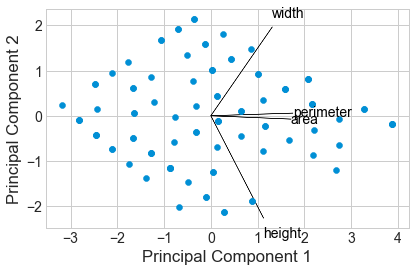

In [33]:
feature_dict = {0: 'width',
                1: 'height',
                2: 'area',
                3: 'perimeter'}

with plt.style.context('seaborn-whitegrid'):
    
    plt.figure(figsize=(6, 4))
    pcs=np.transpose(sklearn_pca.components_[0:2, :]) #two first components (because we might use more...)
    n = pcs.shape[0]    
    
    #draw the loadings
    #Notice that for scaling reasons, we use a factor to show the loadings in a more distinct way.
    scale = 3
    for i in range(n):
        plt.arrow(0, 0, scale*pcs[i,0], scale*pcs[i,1],color = 'black',alpha = 0.9)
        plt.text(pcs[i,0]* scale, pcs[i,1] * scale * 1.15, feature_dict[i], color = 'black', ha = 'left', va = 'center')

    #draw the projected data points
    plt.scatter(Y_sklearn[:, 0],Y_sklearn[:,1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

# 3. Examples

## 3.1 PCA example: 1988 Olympic heptathlon results

The [heptathlon](https://en.wikipedia.org/wiki/Heptathlon) is an Olympic event consisting of seven events: 
1. 100m hurdles
+ shot
+ high jump
+ 200m run
+ long jump
+ javelin
+ 800m run

The values for each of these events are then combined according to [official Olympic rules](https://en.wikipedia.org/wiki/Heptathlon#Points_system) to generate a *score* for each athlete. The athlete with the largest score wins. 

We'll use PCA to analyze the results for the women's heptathlon from the 1988 Olympics held in Seoul, Korea. 
The results for all 25 athletes are contained in the file `heptathlon.csv`. 

In [34]:
hept = pd.read_csv("heptathlon.csv")
print(hept)

                    name     hurdles   highjump   shot   run200m   longjump  \
0   Joyner-Kersee (USA)        12.69       1.86  15.80     22.56       7.27   
1            John (GDR)        12.85       1.80  16.23     23.65       6.71   
2          Behmer (GDR)        13.20       1.83  14.20     23.10       6.68   
3    Sablovskaite (URS)        13.61       1.80  15.23     23.92       6.25   
4     Choubenkova (URS)        13.51       1.74  14.76     23.93       6.32   
5          Schulz (GDR)        13.75       1.83  13.50     24.65       6.33   
6         Fleming (AUS)        13.38       1.80  12.88     23.59       6.37   
7         Greiner (USA)        13.55       1.80  14.13     24.48       6.47   
8      Lajbnerova (CZE)        13.63       1.83  14.28     24.86       6.11   
9         Bouraga (URS)        13.25       1.77  12.62     23.59       6.28   
10        Wijnsma (HOL)        13.75       1.86  13.01     25.03       6.34   
11      Dimitrova (BUL)        13.24       1.80  12.

In [35]:
hept.describe()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.840000,1.782000,13.117600,24.649200,6.152400,41.482400,136.054000,6090.600000
std,0.736648,0.077942,1.491884,0.969557,0.474212,3.545656,8.291088,568.469729
min,12.690000,1.500000,10.000000,22.560000,4.880000,35.680000,124.200000,4566.000000
25%,13.470000,1.770000,12.320000,23.920000,6.050000,39.060000,132.240000,5746.000000
50%,13.750000,1.800000,12.880000,24.830000,6.250000,40.280000,134.740000,6137.000000
75%,14.070000,1.830000,14.200000,25.230000,6.370000,44.540000,138.480000,6351.000000
max,16.420000,1.860000,16.230000,26.610000,7.270000,47.500000,163.430000,7291.000000


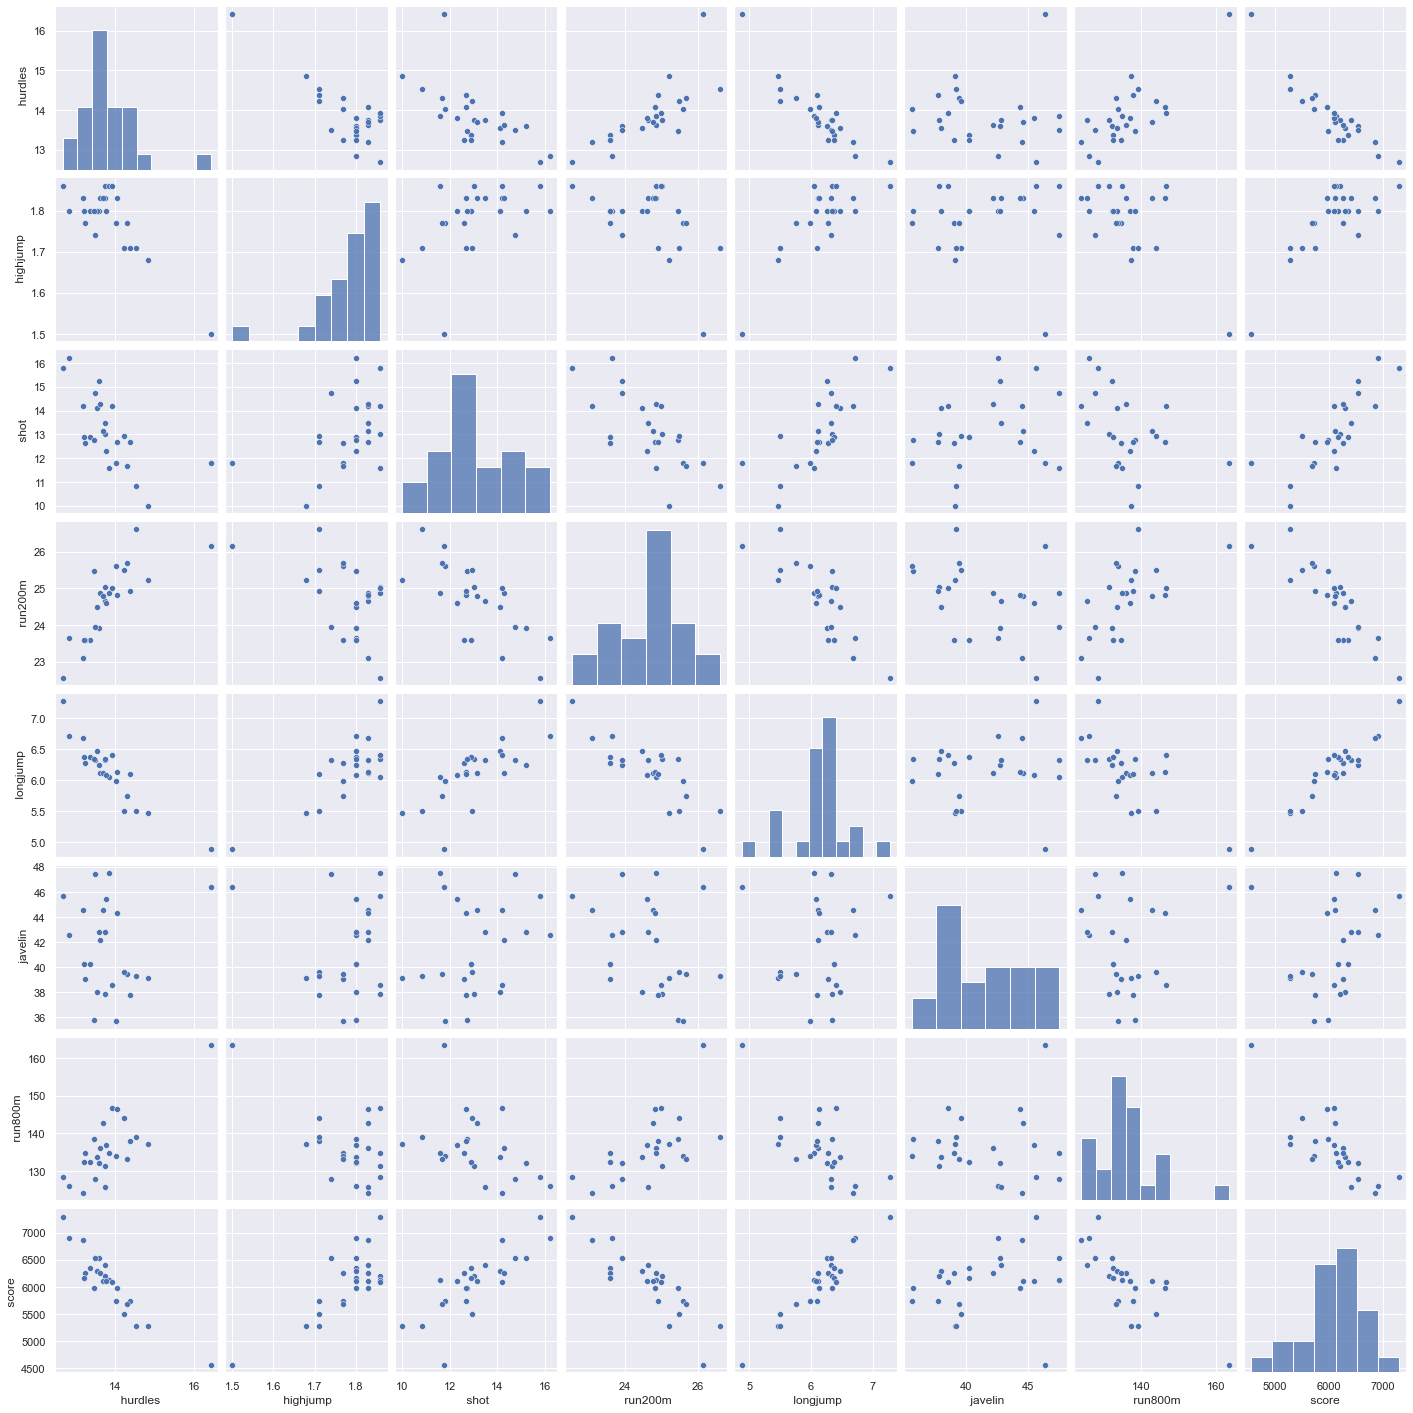

In [36]:
sns.set()
sns.pairplot(hept);

**Question:** Why in the matrix scatterplot are some of the results negatively correlated? 



These plots reveal that there is an outlier, namely, Launa (PNG). We'll remove this athlete before continuing. 

In [37]:
# remove outlier
hept = hept.drop(24)

Now, we'll do a principal component analysis on this data

In [38]:
from sklearn.preprocessing import scale

# scale the dataset
heptn = hept.drop(['name ',' score '],axis=1)
X = scale(heptn.values)
#X = scale(hept.drop(['name ',' score '],axis=1).values)

# find PCA and transform to new coordinates
pca_model = PCA()
X_PCA = pca_model.fit_transform(X)

# create a new pandas dataframe 
df_plot = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,4.859854,0.142870,0.006170,0.299727,0.369615,0.276321,-0.486110
1,3.215649,-0.968992,0.249166,0.560983,-0.769854,-0.385824,-0.052840
2,2.989121,-0.710298,-0.635678,-0.566676,0.194444,0.263348,0.112927
3,1.315841,-0.182857,-0.256023,0.650878,-0.616604,0.220398,0.542167
4,1.535787,-0.982459,-1.818885,0.800898,-0.602383,-0.081867,-0.307288
5,0.979082,-0.358770,-0.421971,-1.137497,-0.730214,0.259840,0.039214
6,0.973952,-0.510576,0.270837,-0.143218,0.884437,-0.037712,0.235008
7,0.646859,-0.384015,1.164865,0.145624,-0.212550,0.145424,-0.065118
8,0.389779,0.727451,0.069866,0.089088,-0.691843,-0.255529,0.363204
9,0.533556,-0.793598,0.491418,0.289848,1.213391,-0.407390,0.201362


In [39]:
pca_loadings = pd.DataFrame(pca_model.components_.T, index=heptn.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7
hurdles,-0.450388,0.057722,-0.173935,-0.048406,-0.198894,0.846651,0.069617
highjump,0.314512,0.651332,0.208827,-0.556946,-0.070764,0.090075,0.331559
shot,0.402488,0.022021,0.153471,0.548267,-0.671665,0.098864,0.229043
run200m,-0.427086,0.185028,0.130129,-0.230959,-0.617818,-0.332794,-0.469719
longjump,0.450964,0.024925,0.269759,-0.014683,0.121518,0.382944,-0.749408
javelin,0.242308,0.325722,-0.880699,0.060248,-0.078744,-0.071934,-0.211081
run800m,-0.302907,0.656505,0.193002,0.574181,0.318802,-0.052177,-0.077186


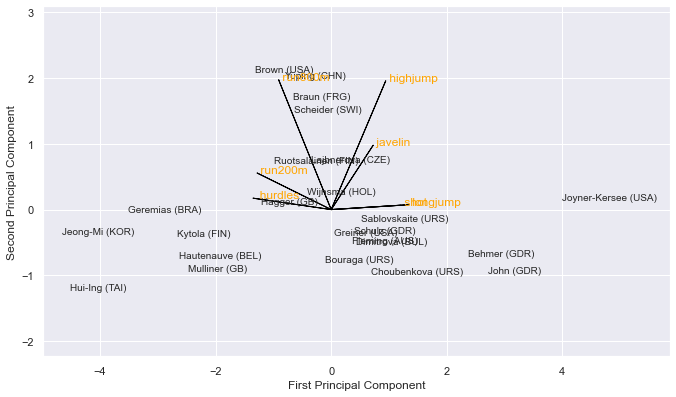

In [40]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(hept['name '].values):
    ax1.annotate(name, (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=10)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

###THIS NEEDS SOME REWORK -- PAY ATTENTION
a = 3 #this is a factor, just to "stretch things on the map"

for i in pca_loadings[['V1', 'V2']].index:
    ax1.annotate(i, (pca_loadings.V1.loc[i]*a, pca_loadings.V2.loc[i]*a), color='orange')

for i in range(0,pca_model.n_components_):
    ax1.arrow(0,0, pca_loadings.V1[i]*a, pca_loadings.V2[i]*a, color="black")

plt.show()

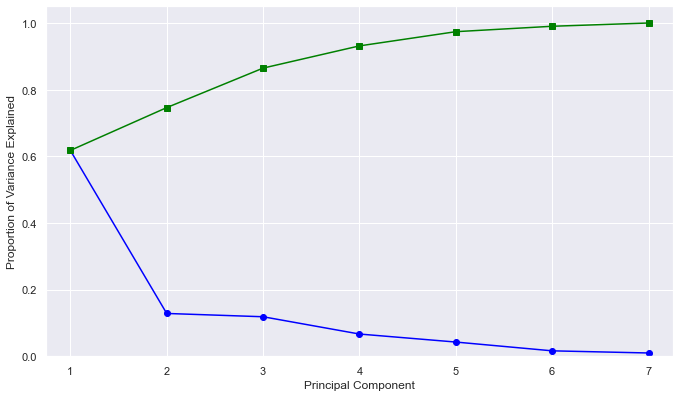

In [41]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_

plt.plot([1,2,3,4,5,6,7], var_ratio, '-o', color="blue", label='Individual component')
plt.plot([1,2,3,4,5,6,7], np.cumsum(var_ratio), '-s', label='Cumulative', color="green")


plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,7.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7])
plt.show()

Most of the variance in the athletes is contained in the first principle component. 

Let's make a plot of the first principle component vs. the score. 

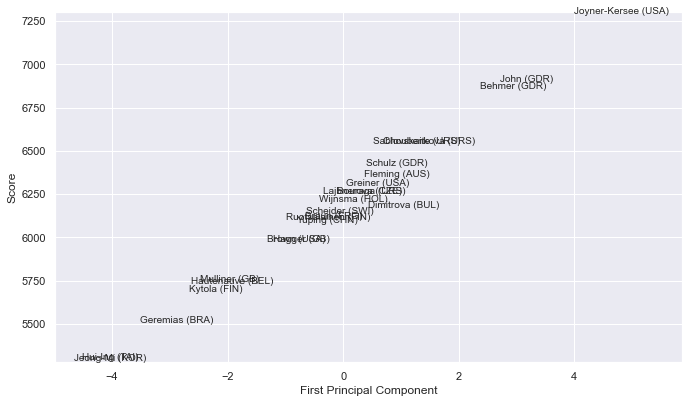

In [42]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(hept[' score '].min()-10,hept[' score '].max()+10)

          
# Plot Principal Components 1 and score
for i,name in enumerate(hept['name '].values):
    ax1.annotate(name, (X_PCA[i,0], hept[' score '][i]), ha='center',fontsize=10)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Score')
plt.show()

The first principal component is highly correlated with the score determined by Olympic rules. Note that the winner of the heptathlon, [Jackie Joyner-Kersee](https://en.wikipedia.org/wiki/Jackie_Joyner-Kersee) really stands out. 

Read more about the 1988 Summer Olympics Women's heptathlon [here](https://en.wikipedia.org/wiki/Athletics_at_the_1988_Summer_Olympics_%E2%80%93_Women%27s_heptathlon). 



## 3.2 Example 2: An SVD recommendation problem

Let's get to the code of loading the ratings and the movies.

In [43]:
import pandas as pd
pd.set_option('display.notebook_repr_html', True)

ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

Take a look at the movies and ratings dataframes.

In [44]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


These look good, but remember we want to "tabularize" our data and bring them to a matrix format (one row per user and one column per movie). We `pivot` `ratings_df` to get that and call the new variable `R`.

In [46]:
R_df = ratings_df.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0)
print(R_df.shape)
R_df.head()

(610, 9724)


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The last thing we (generally) need to do is de-mean the data (normalize by each users mean) and convert it from a dataframe to a numpy array.

In [47]:
R = R_df.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

### Singular Value Decomposition

`Scipy` and `numpy` both have functions to do the singular value decomposition. Here, we are going to use the `scipy` function `svds` because it let us choose how many latent factors we want to use to approximate the original ratings matrix (instead of having to truncate it after).

In [48]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
print(U.shape)
print(sigma)
print(Vt.shape)

(610, 50)
[ 67.86628347  68.1967072   69.02678246  69.4170401   69.91863747
  70.02091789  70.19408599  71.67445157  72.43371861  73.21879553
  73.43760593  74.02644882  74.28978377  74.9207733   75.17528213
  75.59325141  76.70227225  77.35717925  78.39405157  79.04344482
  79.21217131  80.56747647  81.5467832   82.1973482   83.04447645
  85.11688914  85.74871886  86.51711471  87.91550637  90.33575237
  90.9340682   92.26271695  93.39976829  97.10067118  99.28906754
  99.82361796 101.84794614 105.97367358 107.04782929 109.20838712
 112.80840902 120.61532345 122.64724436 134.58721632 139.637245
 153.93097112 163.73084057 184.86187801 231.22453421 474.20606204]
(50, 9724)


The function returns exactly what we explained earlier, except that the $\Sigma$ returned is just the values instead of a diagonal matrix. This is useful, but since we are going to leverage matrix multiplication to get predictions we better convert it to the diagonal matrix form.

In [49]:
sigma = np.diag(sigma)

### Making Predictions from the Decomposed Matrices

We now have everything we need to make movie ratings predictions for every user. We can do it all at once by following the math and matrix multiply $U$, $\Sigma$, and $V^{T}$ back to get the rank $k=50$ approximation of $R$.

I also need to add the user means back to get the actual star ratings prediction.

In [50]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

**POINTS TO THINK**: If we wanted to put this kind of system into production, we first would have to create a training and validation set and optimize the number of latent features ($k$) by minimizing e.g. the Root Mean Square Error. Intuitively, the Root Mean Square Error will decrease on the training set as $k$ increases (because we are approximating the original ratings matrix with a higher rank matrix).

We could create a training and validation set and optimize $k$ by minimizing RMSE and perhaps balance the trade-off of dimensionality vs accuracy (smaller $k$ vs lower RMSE)

### Making Movie Recommendations

It's time. With the predictions matrix for every user, we can build a "function" to recommend movies for any user. All we need to do is return the movies with the highest predicted rating that the specified user hasn't already rated. Though we didn't use actually use any explicit movie content features (such as genre or title), we will merge in that information to get a more complete picture of the recommendations.

We also return the list of movies the user has already rated, for the sake of comparison.

In [51]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


In [52]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userID)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [53]:
already_rated, predictions = recommend_movies(preds_df, 100, movies_df, ratings_df, 10)
preds_df.head()

User 100 has already rated 148 movies.
Recommending highest 10 predicted ratings movies not already rated.


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
0,2.167328,0.402751,0.840184,-0.076281,-0.551337,2.504091,-0.890114,-0.026443,0.196974,1.593259,...,-0.023453,-0.019967,-0.026939,-0.026939,-0.023453,-0.026939,-0.023453,-0.023453,-0.023453,-0.058732
1,0.211459,0.006658,0.033455,0.017419,0.183430,-0.062473,0.083037,0.024158,0.049330,-0.152530,...,0.019498,0.016777,0.022219,0.022219,0.019498,0.022219,0.019498,0.019498,0.019498,0.032281
2,0.003588,0.030518,0.046393,0.008176,-0.006247,0.107328,-0.012416,0.003779,0.007297,-0.059362,...,0.005909,0.006209,0.005610,0.005610,0.005909,0.005610,0.005909,0.005909,0.005909,0.008004
3,2.051549,-0.387104,-0.252199,0.087562,0.130465,0.270210,0.477835,0.040313,0.025858,-0.017365,...,0.004836,0.004172,0.005500,0.005500,0.004836,0.005500,0.004836,0.004836,0.004836,-0.023311
4,1.344738,0.778511,0.065749,0.111744,0.273144,0.584426,0.254930,0.128788,-0.085541,1.023455,...,-0.008042,-0.007419,-0.008664,-0.008664,-0.008042,-0.008664,-0.008042,-0.008042,-0.008042,-0.010127


Nough said, gimme the list

In [54]:
already_rated.head(10)

,userId,movieId,rating,timestamp,title,genres
86,100,1958,5.0,1100186258,Terms of Endearment (1983),Comedy|Drama
101,100,2423,5.0,1100186118,Christmas Vacation (National Lampoon's Christm...,Comedy
137,100,5620,5.0,1100186982,Sweet Home Alabama (2002),Comedy|Romance
55,100,1101,5.0,1100184137,Top Gun (1986),Action|Romance
125,100,4041,5.0,1100184235,"Officer and a Gentleman, An (1982)",Drama|Romance
70,100,1307,4.5,1100183745,When Harry Met Sally... (1989),Comedy|Romance
84,100,1912,4.5,1100186251,Out of Sight (1998),Comedy|Crime|Drama|Romance|Thriller
82,100,1777,4.5,1100184536,"Wedding Singer, The (1998)",Comedy|Romance
81,100,1680,4.5,1100184264,Sliding Doors (1998),Drama|Romance
80,100,1678,4.5,1100186254,"Joy Luck Club, The (1993)",Drama|Romance


In [55]:
predictions

,movieId,title,genres
1202,1704,Good Will Hunting (1997),Drama|Romance
895,1259,Stand by Me (1986),Adventure|Drama
409,500,Mrs. Doubtfire (1993),Comedy|Drama
358,440,Dave (1993),Comedy|Romance
1185,1682,"Truman Show, The (1998)",Comedy|Drama|Sci-Fi
29,39,Clueless (1995),Comedy|Romance
1991,2797,Big (1988),Comedy|Drama|Fantasy|Romance
112,150,Apollo 13 (1995),Adventure|Drama|IMAX
2082,2918,Ferris Bueller's Day Off (1986),Comedy
1209,1721,Titanic (1997),Drama|Romance


Pretty cool! It's generally good to see that, though we didn't actually use the genre of the movie as a feature, the truncated matrix factorization features "picked up" on the underlying tastes and preferences of the user. Try another user_id to see different recommendations.

These look like pretty good recommendations (do they?). Remember that any "real" recommendation system can only be evaluated by the actual users and their preferences (i.e. real-time).

